In [2]:
import pandas as pd
data = pd.read_csv("bank/bank.csv",delimiter=';',header='infer')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


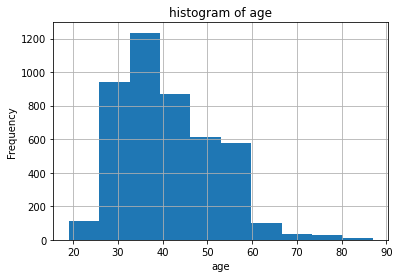

In [3]:
import matplotlib.pyplot as plt
data.age.hist()
plt.title('histogram of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

In [4]:
final = data.drop(['job','marital','education','default','housing',
        'contact','day','month','duration','campaign','pdays','previous','poutcome'],axis=1)
final.head()


,age,balance,loan,y
0,30,1787,no,no
1,33,4789,yes,no
2,35,1350,no,no
3,30,1476,yes,no
4,59,0,no,no


In [5]:
final.isnull().sum() #都沒有缺失

age        0
balance    0
loan       0
y          0
dtype: int64

In [6]:
final.y.replace(('yes','no'),(1,0),inplace=True)
final.loan.replace(('yes','no'),(1,0),inplace=True)
final.head()

,age,balance,loan,y
0,30,1787,0,0
1,33,4789,1,0
2,35,1350,0,0
3,30,1476,1,0
4,59,0,0,0


In [7]:
X = final.drop(['y'],axis=1)
y = final.drop(['age','balance','loan'],axis=1)
X.head()

,age,balance,loan
0,30,1787,0
1,33,4789,1
2,35,1350,0
3,30,1476,1
4,59,0,0


In [8]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [10]:
X_train

,age,balance,loan
3409,48,316,0
773,33,2,0
1110,50,-10,1
3867,58,172,0
1897,49,87,0
...,...,...,...
2558,72,796,0
2202,29,199,1
4237,33,2085,0
3103,34,61,1


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-0.004175445713637371

In [12]:
lr.coef_

array([[ 1.65989773e-03,  2.41548734e-06, -5.81807658e-02]])

In [13]:
from sklearn import tree
dt1 = tree.DecisionTreeClassifier()
dt1.fit(X_train, y_train)
dt1.score(X_test, y_test)


0.7911602209944751

In [14]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_validation_std=sc.transform(X_test)


In [15]:
from sklearn import tree
dt1 = tree.DecisionTreeClassifier()
dt1.fit(X_train_std, y_train)
dt1.score(X_validation_std, y_test)

0.7878453038674034

In [16]:
#Normalization 當feature具有不同的單位時,ex:身高、年齡、收入,使用Normalization最好,因為可避免比較大的數值引起的不穩定
from sklearn.preprocessing import Normalizer
no = Normalizer(norm='l2')
X_train_nor = no.fit_transform(X_train)
X_validation_nor = no.transform(X_test)


In [17]:
from sklearn import tree
dt1 = tree.DecisionTreeClassifier()
dt1.fit(X_train_nor, y_train)
dt1.score(X_validation_nor, y_test)

0.7955801104972375

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)

# Create logistic regressor
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print('Logistic regression score: %.3f' % lr.score(X_test, Y_test))

Logistic regression score: 0.882


C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', max_iter=1000)
sgd.fit(X_train, Y_train)
sgd.score(X_test, Y_test)

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8488063660477454